# Genetic algorithms

## Introduction

In [1]:
from itertools import product

import attr
import numpy as np
import pandas as pd
import seaborn as sns
from evol import Evolution, Population
from tqdm import tqdm_notebook

from genetic_algorithms.examples.robots import *
from genetic_algorithms.utils import MyLogger

sns.set_style("whitegrid")

In [2]:
logger = MyLogger()
pop = Population(
    chromosomes=[random_robot() for _ in range(100)],
    eval_function=fitness,
    maximize=True,
)
evo1 = (
    Evolution()
    .survive(fraction=0.4)
    .breed(parent_picker=pick_random_parents, combiner=make_child)
    .mutate(mutate_function=mutate, sigma=1)
    .evaluate()
    .callback(logger.log)
)
pop.evolve(evo1, n=200)

<Population with size 100 at 2064889728752>

In [3]:
df = pd.DataFrame(logger.individuals_by_generation)

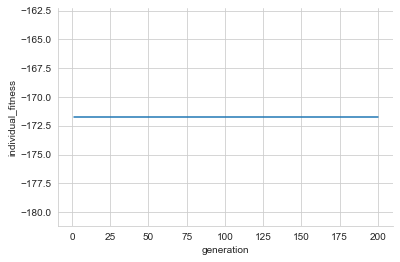

In [4]:
sns.lineplot(
    x="generation",
    y="individual_fitness",
    data=df.groupby("generation").agg(max).reset_index(),
)
sns.despine()

In [ ]:
np.log(16) / np.log(2)